In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rfm = pd.read_csv('/content/clustering_Ex1.csv')

In [3]:
type(rfm)

pandas.core.frame.DataFrame

In [4]:
rfm

cid   R   F           M
0          1069  19   4   486.00000
1          1113  54   4   557.50000
2          1250  19   2   791.50000
3          1359  87   1   364.00000
4          1823  36   3   869.00000
...         ...  ..  ..         ...
32261   2179544   1   1  3753.00000
32262   2179568   1   1   406.00000
32263   2179605   1   1  6001.00000
32264   2179643   1   1   887.00000
32265  20002000  24  27  1814.62963

[32266 rows x 4 columns]

In [5]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32266 entries, 0 to 32265
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cid     32266 non-null  int64  
 1   R       32266 non-null  int64  
 2   F       32266 non-null  int64  
 3   M       32266 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1008.4 KB


In [6]:
data = rfm.iloc[:, 1:4]
print(data)

        R   F           M
0      19   4   486.00000
1      54   4   557.50000
2      19   2   791.50000
3      87   1   364.00000
4      36   3   869.00000
...    ..  ..         ...
32261   1   1  3753.00000
32262   1   1   406.00000
32263   1   1  6001.00000
32264   1   1   887.00000
32265  24  27  1814.62963

[32266 rows x 3 columns]


In [7]:
#另一種選擇欄位的方法
df = rfm[['R', 'F', 'M']]
df.head()

R  F      M
0  19  4  486.0
1  54  4  557.5
2  19  2  791.5
3  87  1  364.0
4  36  3  869.0

In [8]:
data.describe()

R             F             M
count  32266.000000  32266.000000  32266.000000
mean      37.435474      3.706006   1033.573282
std       33.658454      4.835997   1174.584795
min        1.000000      1.000000      8.000000
25%        9.000000      1.000000    366.333333
50%       26.000000      2.000000    710.062500
75%       59.000000      4.000000   1305.650000
max      120.000000     86.000000  43917.000000

最小值最大值正規化(Min-Max Normalization)

In [9]:
# 載入套件
from sklearn.preprocessing import MinMaxScaler
# 建立模型框架
scaler = MinMaxScaler(feature_range = (0, 1))

In [10]:
# 進行資料轉換
df_minmax = scaler.fit_transform(data)
df_minmax

array([[0.1512605 , 0.03529412, 0.01088615],
       [0.44537815, 0.03529412, 0.01251452],
       [0.1512605 , 0.01176471, 0.01784372],
       ...,
       [0.        , 0.        , 0.13648683],
       [0.        , 0.        , 0.02001867],
       [0.19327731, 0.30588235, 0.04114486]])

In [11]:
df_minmax = pd.DataFrame(df_minmax, columns = ['R', 'F', 'M'])
df_minmax

R         F         M
0      0.151261  0.035294  0.010886
1      0.445378  0.035294  0.012515
2      0.151261  0.011765  0.017844
3      0.722689  0.000000  0.008108
4      0.294118  0.023529  0.019609
...         ...       ...       ...
32261  0.000000  0.000000  0.085290
32262  0.000000  0.000000  0.009064
32263  0.000000  0.000000  0.136487
32264  0.000000  0.000000  0.020019
32265  0.193277  0.305882  0.041145

[32266 rows x 3 columns]

進行分群

In [12]:
from sklearn.cluster import KMeans
model_KMC = KMeans(n_clusters = 4, init="random", max_iter = 500, random_state = 42)

In [13]:
model_KMC.fit_predict(df_minmax)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 0, 3, ..., 3, 3, 3], dtype=int32)

In [14]:
r1 = pd.Series(model_KMC.labels_).value_counts()
r1

3    14873
2     8612
1     4468
0     4313
Name: count, dtype: int64

In [15]:
r2 = pd.DataFrame(model_KMC.cluster_centers_)
r2

0         1         2
0  0.583622  0.008339  0.022813
1  0.840372  0.003202  0.024649
2  0.299703  0.017203  0.026950
3  0.069000  0.055724  0.021045

In [16]:
r21 = pd.concat([r2, r1], axis = 1)
r21

0         1         2  count
0  0.583622  0.008339  0.022813   4313
1  0.840372  0.003202  0.024649   4468
2  0.299703  0.017203  0.026950   8612
3  0.069000  0.055724  0.021045  14873

In [17]:
r21.columns = list(df_minmax.columns) + ['size_of_Group']
r21

R         F         M  size_of_Group
0  0.583622  0.008339  0.022813           4313
1  0.840372  0.003202  0.024649           4468
2  0.299703  0.017203  0.026950           8612
3  0.069000  0.055724  0.021045          14873

In [18]:
r = pd.concat([df_minmax, pd.Series(model_KMC.labels_, index = df_minmax.index)], axis = 1)
r

R         F         M  0
0      0.151261  0.035294  0.010886  3
1      0.445378  0.035294  0.012515  0
2      0.151261  0.011765  0.017844  3
3      0.722689  0.000000  0.008108  1
4      0.294118  0.023529  0.019609  2
...         ...       ...       ... ..
32261  0.000000  0.000000  0.085290  3
32262  0.000000  0.000000  0.009064  3
32263  0.000000  0.000000  0.136487  3
32264  0.000000  0.000000  0.020019  3
32265  0.193277  0.305882  0.041145  3

[32266 rows x 4 columns]

In [19]:
r.columns = list(df_minmax.columns) + ['GroupID']
r

R         F         M  GroupID
0      0.151261  0.035294  0.010886        3
1      0.445378  0.035294  0.012515        0
2      0.151261  0.011765  0.017844        3
3      0.722689  0.000000  0.008108        1
4      0.294118  0.023529  0.019609        2
...         ...       ...       ...      ...
32261  0.000000  0.000000  0.085290        3
32262  0.000000  0.000000  0.009064        3
32263  0.000000  0.000000  0.136487        3
32264  0.000000  0.000000  0.020019        3
32265  0.193277  0.305882  0.041145        3

[32266 rows x 4 columns]

In [20]:
rfm["k-means"] = model_KMC.labels_
rfm

cid   R   F           M  k-means
0          1069  19   4   486.00000        3
1          1113  54   4   557.50000        0
2          1250  19   2   791.50000        3
3          1359  87   1   364.00000        1
4          1823  36   3   869.00000        2
...         ...  ..  ..         ...      ...
32261   2179544   1   1  3753.00000        3
32262   2179568   1   1   406.00000        3
32263   2179605   1   1  6001.00000        3
32264   2179643   1   1   887.00000        3
32265  20002000  24  27  1814.62963        3

[32266 rows x 5 columns]

In [21]:
rfm.to_csv("rfm_KMC_Output.csv", index = False)

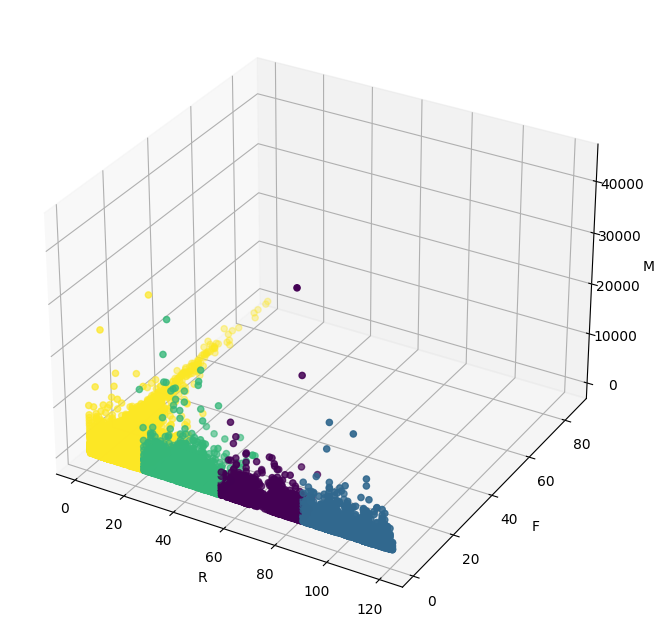

In [22]:
#3D散佈圖_精簡方法
dft = pd.read_csv('/content/rfm_KMC_Output.csv')
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection = '3d')
ax.scatter(dft['R'], dft['F'], dft['M'], c = dft['k-means'], marker = 'o')
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')

plt.show()

In [23]:
# (補充)另一種畫3D互動圖的方法
# 參考網址：https://plotly.com/python/3d-scatter-plots/
#import plotly.express as px
#fig = px.scatter_3d(dft, x='R', y='F', z='M', color='k-means')
#fig.show()

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [25]:
SSE = []
for k in range(2, 11):
    est = KMeans(n_clusters = k, n_init = 'auto', init="random")
    est.fit(df_minmax)
    SSE.append(est.inertia_)

SSE

[690.7946267218051,
 337.54163313465585,
 248.20358453043187,
 195.2367370477865,
 150.89895366938234,
 122.92967479888316,
 104.34556514100196,
 89.41979681363638,
 78.65294452149269]

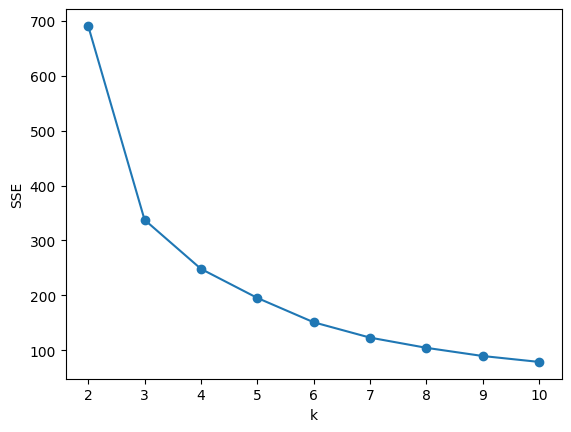

In [26]:
X = range(2, 11)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')

plt.show()

In [27]:
#將每一群客戶資料抽出另外儲存
group0 = r[r['GroupID'] == 0]
group1 = r[r['GroupID'] == 1]
group2 = r[r['GroupID'] == 2]
group3 = r[r['GroupID'] == 3]

In [28]:
#每一群的基本統計量描述
group0.describe()
group1.describe()
group2.describe()
group3.describe()

R             F             M  GroupID
count  14873.000000  14873.000000  14873.000000  14873.0
mean       0.069000      0.055724      0.021045      3.0
std        0.051613      0.074481      0.021420      0.0
min        0.000000      0.000000      0.000000      3.0
25%        0.025210      0.011765      0.008322      3.0
50%        0.058824      0.035294      0.015240      3.0
75%        0.109244      0.070588      0.026692      3.0
max        0.210084      1.000000      0.615759      3.0

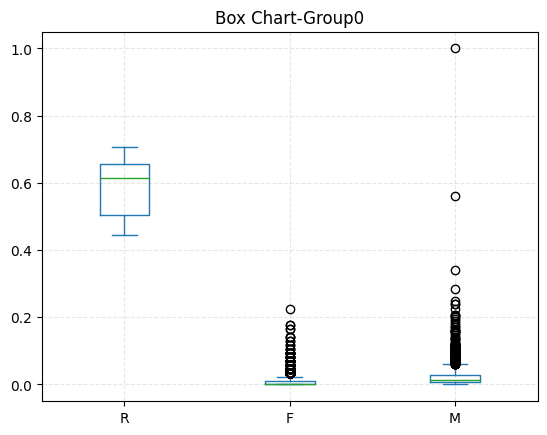

In [29]:
group0 = group0[['R', 'F', 'M']]
group0.plot.box(title = "Box Chart-Group0")
plt.grid(linestyle = "--", alpha = 0.3)

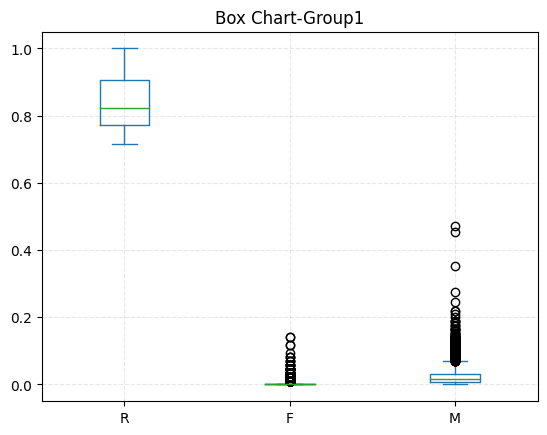

In [30]:
group1 = group1[['R', 'F', 'M']]
group1.plot.box(title = "Box Chart-Group1")
plt.grid(linestyle = "--", alpha = 0.3)

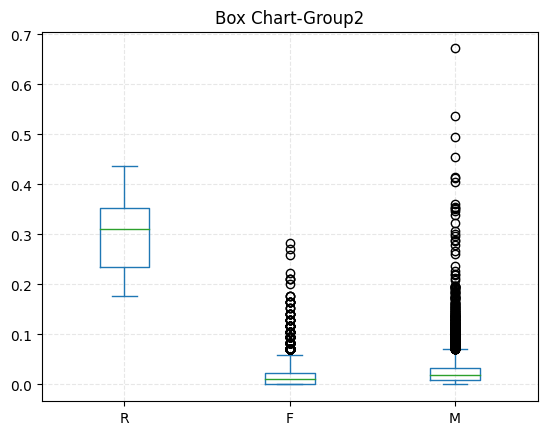

In [31]:
group2 = group2[['R', 'F', 'M']]
group2.plot.box(title = "Box Chart-Group2")
plt.grid(linestyle = "--", alpha = 0.3)

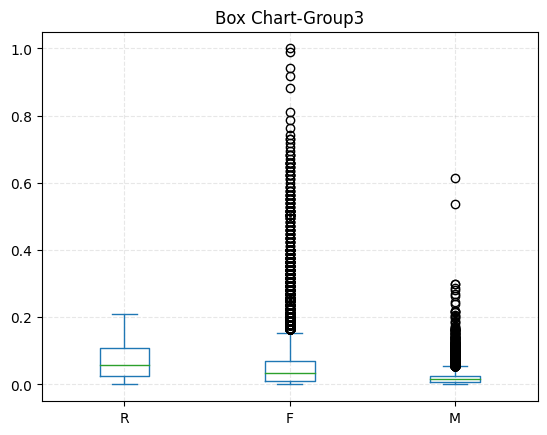

In [32]:
group3 = group3[['R', 'F', 'M']]
group3.plot.box(title = "Box Chart-Group3")
plt.grid(linestyle = "--", alpha = 0.3)

In [33]:
g0 = r[r['GroupID'] == 0]
g1 = r[r['GroupID'] == 1]
g2 = r[r['GroupID'] == 2]
g3 = r[r['GroupID'] == 3]

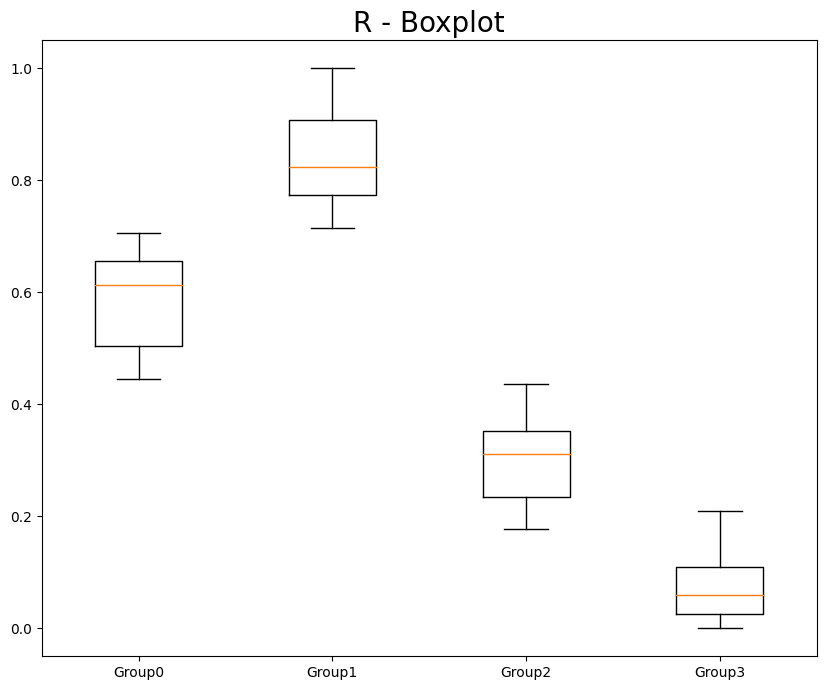

In [34]:
plt.figure(figsize = (10, 8))
labels = 'Group0', 'Group1', 'Group2', 'Group3'
plt.boxplot([g0['R'], g1['R'], g2['R'], g3['R']], labels = labels)
plt.title('R - Boxplot', fontsize = 20)

plt.show()

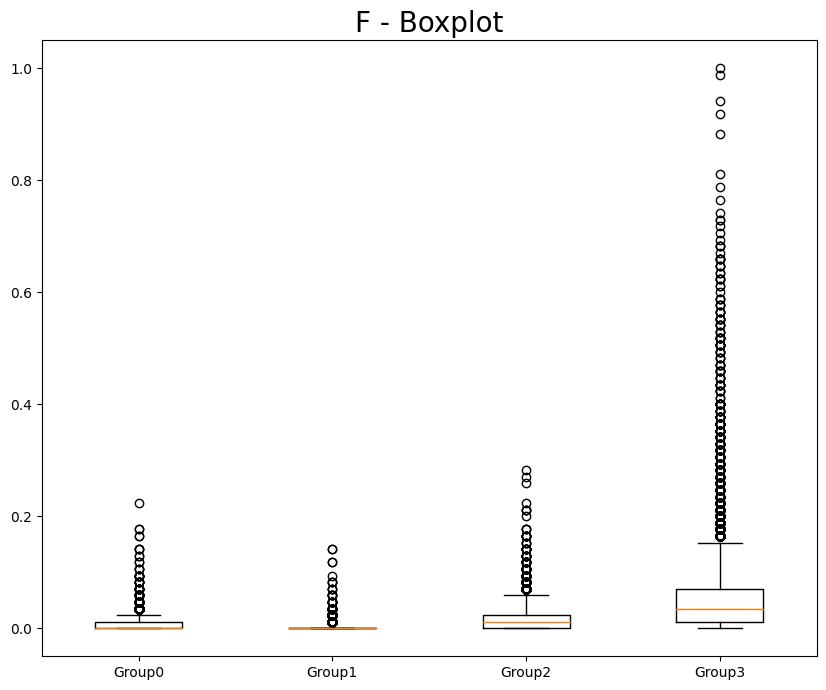

In [35]:
plt.figure(figsize = (10, 8))
labels = 'Group0', 'Group1', 'Group2', 'Group3'
plt.boxplot([g0['F'], g1['F'], g2['F'], g3['F']], labels = labels)
plt.title('F - Boxplot', fontsize = 20)

plt.show()

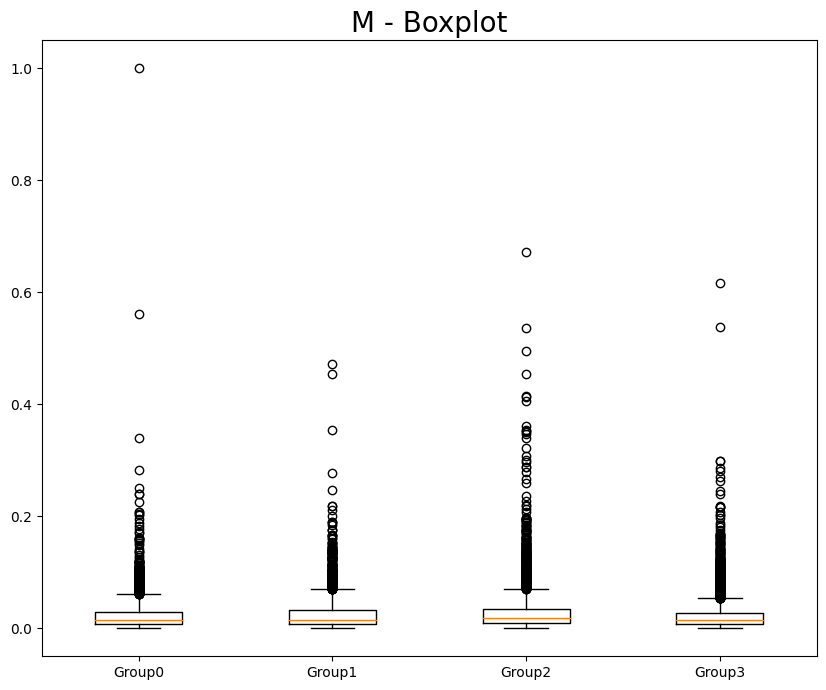

In [36]:
plt.figure(figsize = (10, 8))
labels = 'Group0', 'Group1', 'Group2', 'Group3'
plt.boxplot([g0['M'], g1['M'], g2['M'], g3['M']], labels = labels)
plt.title('M - Boxplot', fontsize = 20)

plt.show()